###### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied). Also, if some data pre-processing is necessary do that as well.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data= pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Basic info

In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

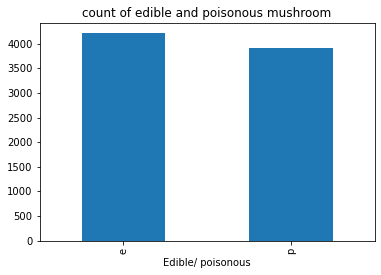

In [8]:
data['class'].value_counts().plot(kind='bar')
plt.xlabel('Edible/ poisonous', rotation=0)
plt.title('count of edible and poisonous mushroom')
plt.show()

Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [10]:
labels=['cap-shape', 'cap-surface', 'cap-color','odor','gill-color','stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [11]:
for i in labels:
    data[i]=le.fit_transform(data[i])

In [12]:
data= pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,ring-type,spore-print-color,population,habitat,class_p,bruises_t,gill-attachment_f,gill-spacing_w,gill-size_n,stalk-shape_t
0,5,2,4,6,4,3,2,2,7,7,...,4,2,3,5,1,1,1,0,1,0
1,5,2,9,0,4,2,2,2,7,7,...,4,3,2,1,0,1,1,0,0,0
2,0,2,8,3,5,2,2,2,7,7,...,4,3,2,3,0,1,1,0,0,0
3,5,3,8,6,5,3,2,2,7,7,...,4,2,3,5,1,1,1,0,1,0
4,5,2,3,5,4,3,2,2,7,7,...,0,3,0,1,0,0,1,1,0,1


Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

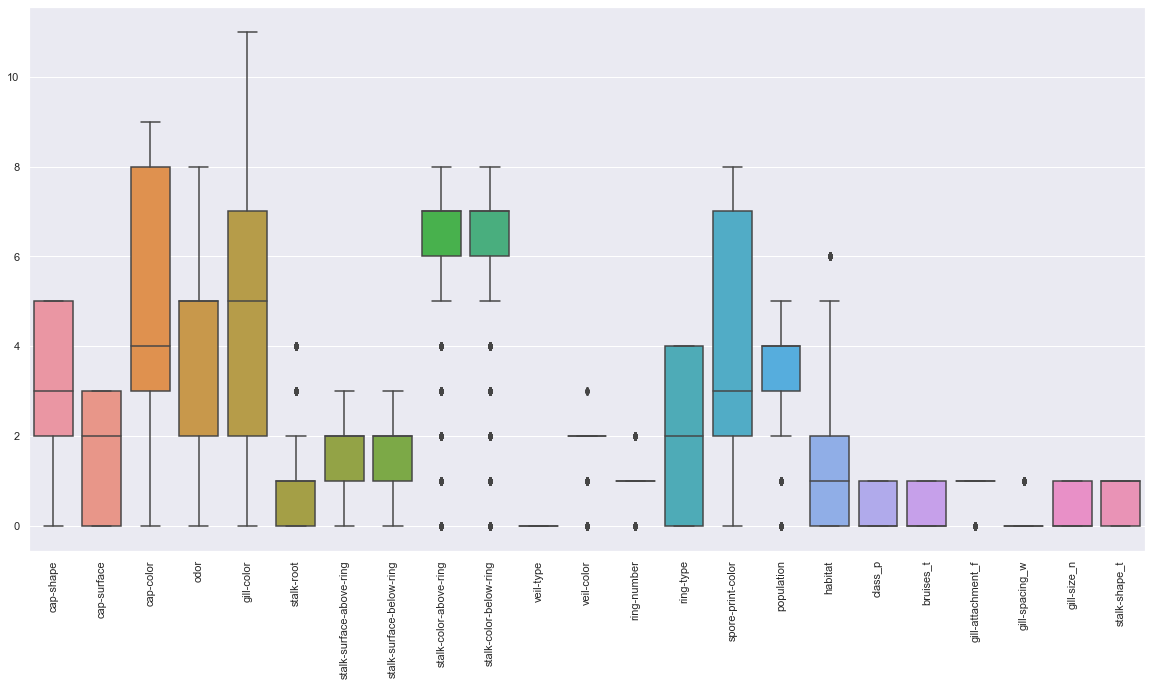

In [14]:
sns.set(rc={"figure.figsize":(20,10)}) 
sns.boxplot(data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

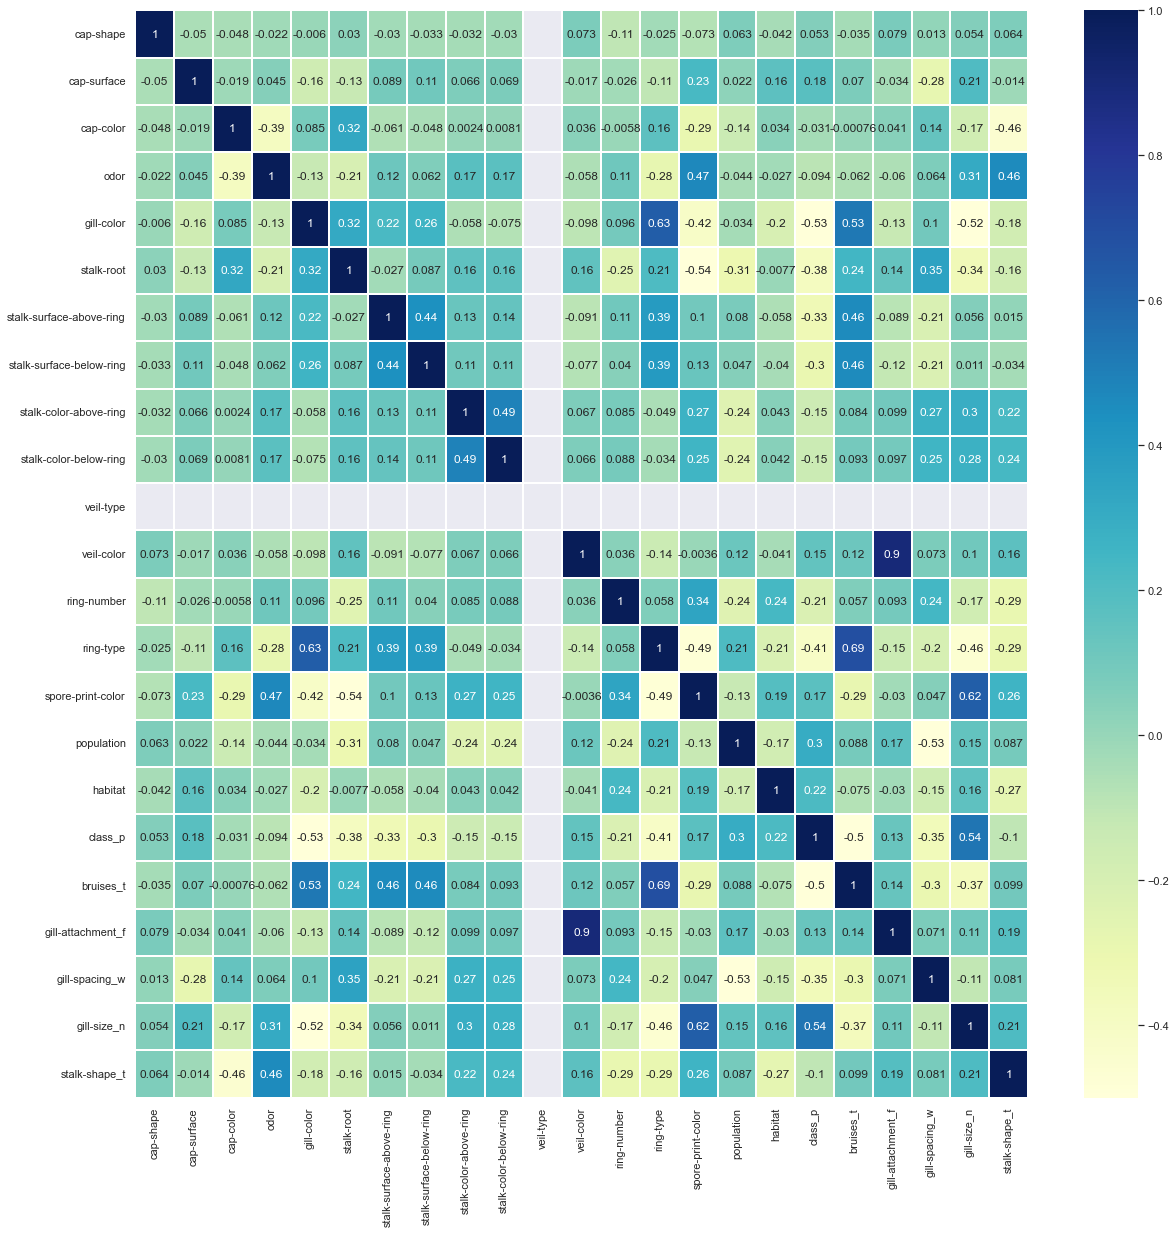

In [15]:
corr=data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,vmin=-0.5,vmax=1,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.show

splitting of data

In [16]:
x= data.drop(['class_p'],axis=1)
y=data['class_p']

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size= 0.25)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr_model= lr.fit(x_train,y_train)
lr_pred= lr_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
f1_lr= f1_score(y_test,lr_pred)*100
f1_lr

94.85368314833501

In [21]:
acc_lr= accuracy_score(y_test,lr_pred)*100
acc_lr

94.97784342688331

In [22]:
confusion_matrix(y_test,lr_pred)

array([[989,  51],
       [ 51, 940]], dtype=int64)

### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
neighbors= np.arange(1,15)
for k in neighbors:
 knn= KNeighborsClassifier(n_neighbors=k, metric='minkowski')
 knn_model= knn.fit(x_train,y_train)
 knn_pred= knn_model.predict(x_test)
 accu= accuracy_score(y_test,knn_pred)
 acc.append(accu)

In [24]:
acc

[0.999015263417036,
 0.9985228951255539,
 0.9980305268340719,
 0.9970457902511078,
 0.9960610536681438,
 0.9965534219596258,
 0.9955686853766618,
 0.9950763170851797,
 0.9960610536681438,
 0.9945839487936977,
 0.9935992122107337,
 0.9931068439192516,
 0.9926144756277696,
 0.9940915805022157]

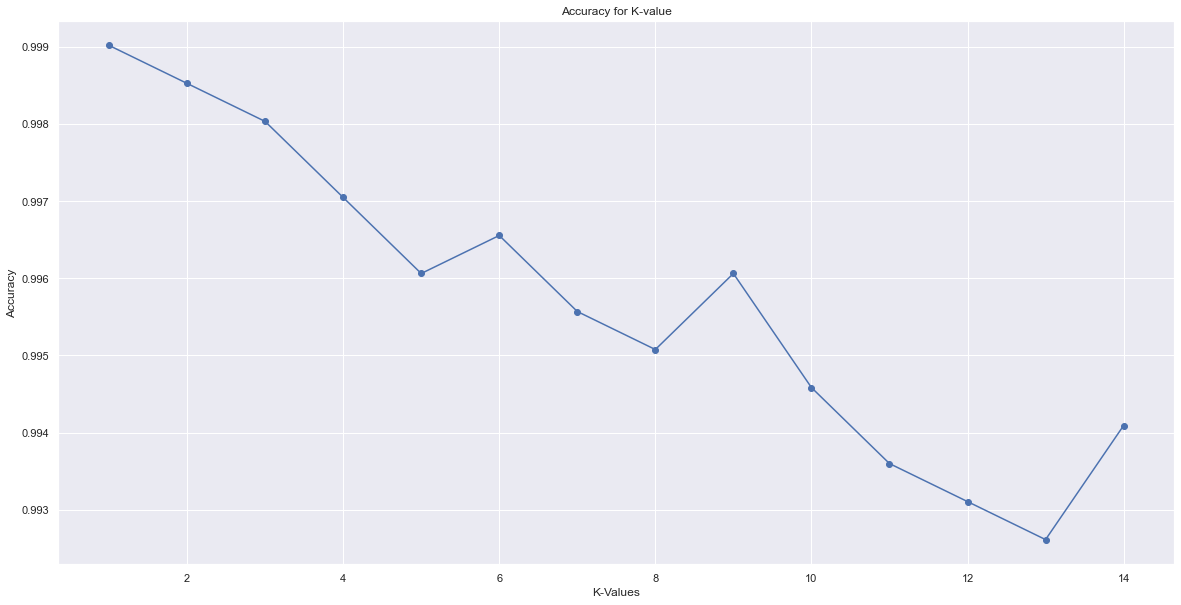

In [25]:
plt.plot(neighbors, acc,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [26]:
knn= KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn_model= knn.fit(x_train,y_train)
knn_pred= knn_model.predict(x_test)
acc_knn= accuracy_score(y_test,knn_pred)*100
acc_knn

99.9015263417036

In [27]:
f1_knn= f1_score(y_test,knn_pred)*100
f1_knn

99.89909182643795

In [28]:
confusion_matrix(y_test,knn_pred)

array([[1039,    1],
       [   1,  990]], dtype=int64)

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
y_pred_dt= dt_model.predict(x_test)

In [30]:
f1_dt=f1_score(y_test, y_pred_dt)*100
f1_dt

100.0

In [31]:
acc_dt= accuracy_score(y_test, y_pred_dt)*100
acc_dt

100.0

In [32]:
confusion_matrix(y_test, y_pred_dt)

array([[1040,    0],
       [   0,  991]], dtype=int64)

### Random forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(x_train,y_train)
rfc_pred=rfc_model.predict(x_test)

In [34]:
f1_rfc=f1_score(y_test, rfc_pred)*100
f1_rfc

100.0

In [35]:
acc_rfc= accuracy_score(y_test, rfc_pred)*100
acc_rfc

100.0

In [36]:
confusion_matrix(y_test, rfc_pred)

array([[1040,    0],
       [   0,  991]], dtype=int64)

### Linear SVM

In [37]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_pred_lsvm= svm_model.predict(x_test)

In [38]:
acc_svm= accuracy_score(y_test,y_pred_lsvm)*100
f1_svm=f1_score(y_test,y_pred_lsvm)*100
confusion_matrix(y_test, y_pred_lsvm)

array([[994,  46],
       [ 36, 955]], dtype=int64)

In [39]:
f1_svm

95.88353413654619

In [40]:
acc_svm

95.96258000984736

### Radial SVM

In [41]:
rsvm=SVC(kernel='rbf')
rsvm_model= rsvm.fit(x_train,y_train)
y_pred_rsvm= rsvm_model.predict(x_test)

In [42]:
acc_rsvm= accuracy_score(y_test,y_pred_rsvm)*100
f1_rsvm=f1_score(y_test,y_pred_rsvm)*100
confusion_matrix(y_test, y_pred_rsvm)

array([[1038,    2],
       [  15,  976]], dtype=int64)

### Polynomial SVM

In [43]:
psvm=SVC(kernel='poly',degree=2)
psvm_model= psvm.fit(x_train,y_train)
y_pred_psvm= psvm_model.predict(x_test)

In [44]:
acc_psvm= accuracy_score(y_test,y_pred_psvm)*100
f1_psvm=f1_score(y_test,y_pred_psvm)*100
confusion_matrix(y_test, y_pred_psvm)

array([[1029,   11],
       [  20,  971]], dtype=int64)

### Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [46]:
acc_gnb= accuracy_score(y_test,y_pred_gnb)*100
f1_gnb=f1_score(y_test,y_pred_gnb)*100
confusion_matrix(y_test, y_pred_gnb)

array([[958,  82],
       [ 67, 924]], dtype=int64)

In [47]:
f1_gnb

92.53880821231847

In [48]:
acc_gnb

92.66371245691778

### Bernoulli naive bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [50]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
confusion_matrix(y_test, y_pred_bnb)

array([[984,  56],
       [260, 731]], dtype=int64)

In [51]:
f1_bnb

82.22722159730034

In [52]:
acc_bnb

84.4411619891679

In [53]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'KNN',
              'Decision Tree',
              'Random Forest',
              'Linear SVM',
              'Radial SVM',
              'Polynomial SVM',
              'Gaussian Naive Bayes',
              'Bernoulli Naive Bayes'
              ],
    'f1-Score': [ f1_lr,
                      f1_knn, 
                      f1_dt,
                      f1_rfc,
                      f1_svm,
                      f1_rsvm,
                      f1_psvm,
                      f1_gnb,
                      f1_bnb],
    'Accuracy_score':[ acc_lr,
                      acc_knn, 
                      acc_dt,
                      acc_rfc,
                      acc_svm,
                      acc_rsvm,
                      acc_psvm,
                      acc_gnb,
                      acc_bnb
                     ]})

In [54]:
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df.reset_index(drop=True,inplace=True)
result_df.head(10)

,Model,f1-Score,Accuracy_score
0,Decision Tree,100.000000,100.000000
1,Random Forest,100.000000,100.000000
2,KNN,99.899092,99.901526
3,Radial SVM,99.136618,99.162974
4,Polynomial SVM,98.428789,98.473658
5,Linear SVM,95.883534,95.962580
6,Logistic Regression,94.853683,94.977843
7,Gaussian Naive Bayes,92.538808,92.663712
8,Bernoulli Naive Bayes,82.227222,84.441162


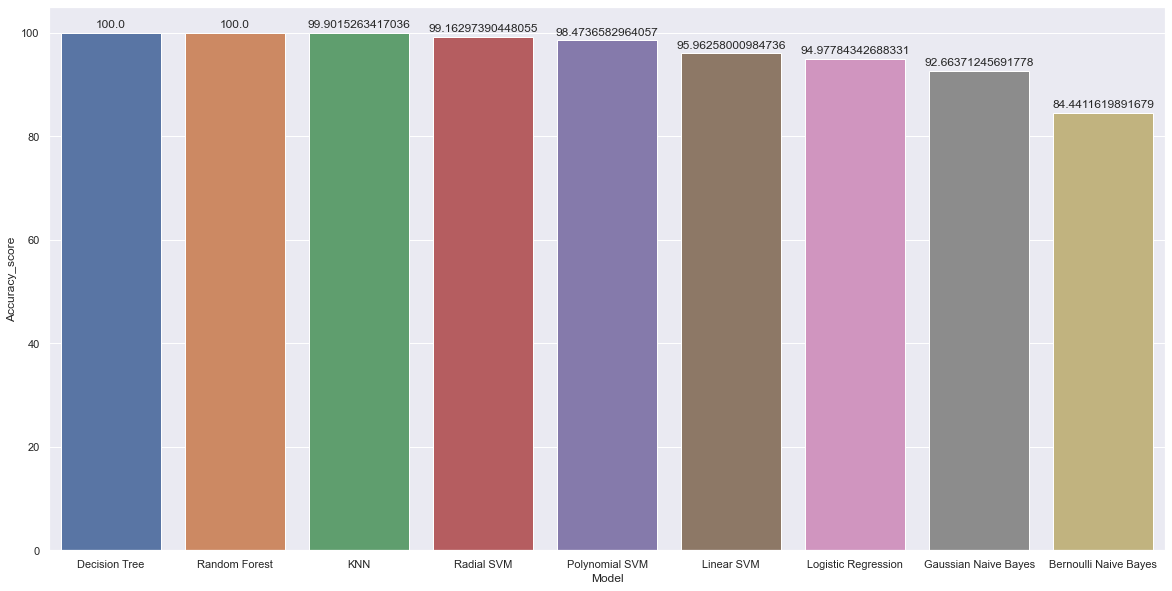

In [55]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='Model',y='Accuracy_score',data=result_df)
labels = (result_df['Accuracy_score'])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center')